In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
# Import E-commerce dataset from Kaggle. Add column headers to dataset.
import pandas as pd
path = '/content/drive/MyDrive/ecommerceDataset.csv'
mydata = pd.read_csv(path)
mydata.columns = ['Category', 'Product Description']
mydata = mydata[mydata['Product Description'].apply(lambda x: isinstance(x, str))]  # Keep rows with string data type
mydata = mydata[mydata['Product Description'].map(lambda x: x.isascii())]   # Remove rows containing non-english words
mydata = mydata.sample(frac=0.10)   # Shuffle rows in dataframe and keep only 10% of rows
display(mydata.head())

,Category,Product Description
36857,Clothing & Accessories,lana vels Men's and Women's Non-slip Stays Hol...
33303,Clothing & Accessories,IndiWeaves Girls Cottton Black Leggings Pack o...
45829,Electronics,Lapcare 5-in-1 Screen Cleaning Kit with Suctio...
25170,Books,Handbook of Chemistry About the Author An edit...
24610,Books,Japji Sahib Way to God in Sikhism - Book 1 (An...


In [109]:
# Set up feature (X) and target (Y)
X_data = mydata['Product Description']
Y_data = mydata['Category']

In [110]:
# Text preprocessing. Remove stop words and convert data to tf-idf representation.
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(stop_words=list(stopwords))

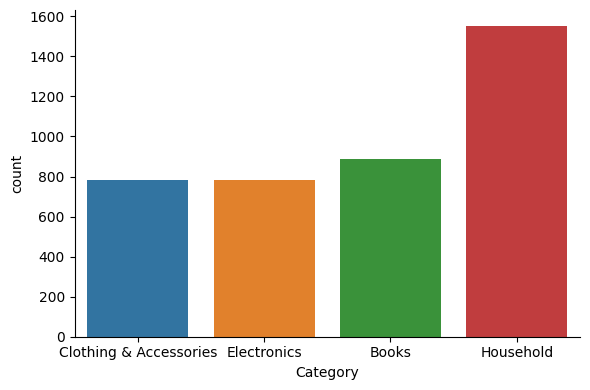

In [111]:
# Display graphical distribution of the target classes
import seaborn as sns
graph = sns.catplot(x="Category", kind="count", data=mydata, height=4, aspect=1.5)

The dataset has two columns: category and product description. The product description consists of the product and description from an E-commerce website. The category consists of the 4 E-commerce categories that the product is associated with: Household, Books, Clothing and Accessories, Electronics. The trained model should be able to predict which one of the 4 categories the product belongs to based on the product and description.

In [112]:
# Split data into train and test datasets. 80% train and 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X_data, Y_data, test_size=0.2, train_size=0.8, random_state=56)

In [113]:
# Apply tf-idf vectorizer to the train and test data. Fit and transform the train data. Only transform the test data.
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [114]:
# Train model using multinomial naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [115]:
# Train model using multinomial logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='multinomial', class_weight='balanced')
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [116]:
# Train model using neural network
from sklearn.neural_network import MLPClassifier
neural_net = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(2), random_state=1)
neural_net.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=2, random_state=1, solver='lbfgs')

In [117]:
# Evaluate naive bayes trained model on the test data
from sklearn.metrics import accuracy_score
nb_pred = naive_bayes.predict(X_test)
print('Accuracy Score (Naive Bayes): ', accuracy_score(y_test, nb_pred))

# Evaluate logistic regression trained model on the test data
import numpy as np
lr_pred = log_reg.predict(X_test)
print("Accuracy Score (Logistic Regression): ", np.mean(lr_pred==y_test))

# Evaluate neural network trained model on the test data
nn_pred = neural_net.predict(X_test)
print("Accuracy Score (Neural Network): ", np.mean(nn_pred==y_test))

Accuracy Score (Naive Bayes):  0.8865336658354115
Accuracy Score (Logistic Regression):  0.942643391521197
Accuracy Score (Neural Network):  0.9102244389027432


I ran this code 2-3 times where each time it will spit out different accuracy scores for all 3 models since I am shuffling the rows at the beginning of this code. For my dataset, the logistic regression consistently did the best out of the 3 approaches with around 95% accuracy. The naive bayes approaches did okay with around 89% accuracy. Interestingly, with the neural network approach, the accuracy varied significantly compared to the other two approaches with accuracies of 91%, 79%, and 85%. It makes sense that the naive bayes approach did ok relatively since the dataset was not small. The neural network approach did okay as well since this approach requires a larger dataset to be more accurate and I only add one hidden layer due to the low amount of features.